#### Import Necessary Libraries

In [22]:
import pandas as pd
import os

#### Task #1: Merging the datasets.

In [52]:
merging_df = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data')]  # extracting all csv files

for file in files:
    df1 = pd.read_csv("./Sales_Data/" + file) # converting a csv file to dataframe
    merging_df= pd.concat([merging_df, df1])

merging_df.to_csv("All_Data.csv", index = False)

#### Read in updated DataFrame

In [53]:
df = pd.read_csv("All_Data.csv")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Data Cleaning

##### Droping NaN's rows

In [56]:
nan_df = df[df.isna().any(axis=1)]  # finding NaN's rows
nan_df.head()
df = df.dropna(how='any')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


##### Dealing "Or's" values

In [62]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


##### Modifying Columns as per their Data Types

In [69]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

#### Task 2: Add Month Column

In [67]:

df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
#df['Month'] = pd.to_numeric(df['Month'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


##### Task 3: Adding a sales Column

In [86]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df = df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
         'Sales',  'Month','Order Date', 'Purchase Address']]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,12,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,12,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,12,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,12,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Question 1: What was the best month for sale? And, how much was earned that month?

##### Getting up Total Sales per Month

In [79]:
total = df.groupby('Month').sum()['Sales']
total

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

##### Plotting Sales Data

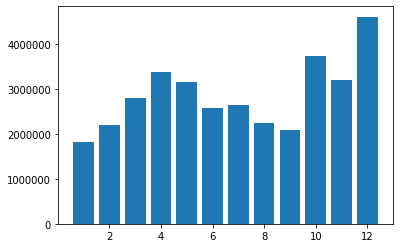

In [82]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, total)
plt.show()